# Compare models: min-move strategy

Games 0-100: Fixed

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
os.chdir('models')

(3, 1000)


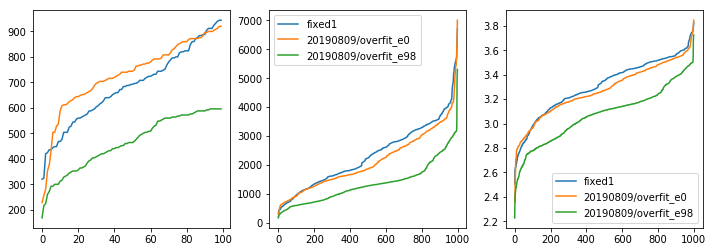

Overfitting on test set does not produce a strong model


In [7]:
# 1cycle policy to overfit test set. (low decay)
results = []
names = ['fixed1.npz',
         '20190809/overfit_e0.npz',
         '20190809/overfit_e98.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(12, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:100])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

print('Overfitting on test set does not produce a strong model')

(3, 1000)


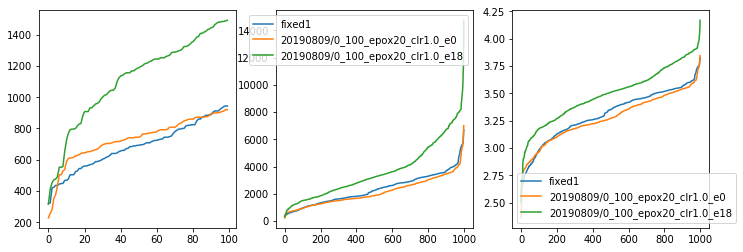

Limited # of epochs to stop overfitting (i.e. early stopping). Model is stronger than fixed!


In [9]:
# Manually pick epochs for 1cycle policy to prevent validation loss from going up.
results = []
names = ['fixed1.npz',
         '20190809/0_100_epox20_clr1.0_e0.npz',
         '20190809/0_100_epox20_clr1.0_e18.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(12, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:100])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

print('Limited # of epochs to stop overfitting (i.e. early stopping). Model is stronger than fixed!')

(3, 1000)


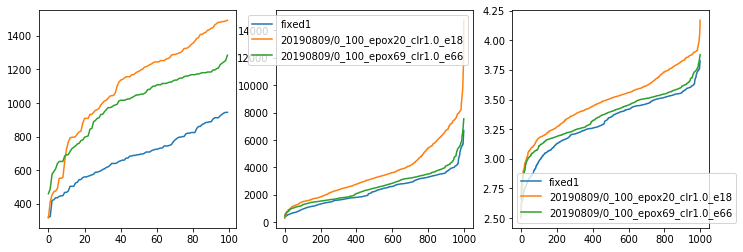

Ks_2sampResult(statistic=0.097, pvalue=0.00016232041211307663)
Ks_2sampResult(statistic=0.228, pvalue=3.4392828740186846e-23)
[3.30919566 3.49190948 3.37007845]


In [14]:
# Use ax to choose hyperparameters
results = []
names = ['fixed1.npz',
         '20190809/0_100_epox20_clr1.0_e18.npz',
         '20190809/0_100_epox69_clr1.0_e66.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(12, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:100])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

for i in range(len(logresults)-1):
    print(stats.ks_2samp(logresults[i], logresults[-1]))
print(np.mean(logresults, axis=1))

Ax parameters has better min-dead performance but is weaker overall. Both networks are stronger than Fixed.